In [10]:
from etc.init import *
import etc.figureslib as lib

import NotebookScripter
from NotebookScripter import run_notebook, receive_parameter
NotebookScripter.set_notebook_option(with_matplotlib_backend=None)
savefig = receive_parameter(savefig=False)
saveext = receive_parameter(saveext='pdf')
try:
    data
except NameError:
    data = receive_parameter(data=None)

mplconfig = run_notebook("Figures_matplotlib_config.ipynb")
inject_vars(mplconfig, globals())
if data is None:
    data = run_notebook("Figures_load_data.ipynb")
records = data.records

----

**NOTE** Uncomment to render the 4pop figure. This may lock your computer as it requires ~6GB RAM.

In [11]:
fitrecords_2pop = lib.RecordSet('20180827-100303')
#fitrecords_4pop = lib.RecordSet('20181107-110946', '20181113-091205', '20190612-125539')

In [12]:
fitcoll_2pop = lib.FitCollView(
            list(fitrecords_2pop.extract("parameters", "outputpath")))
#fitcoll_4pop = lib.FitCollView(
#            list(fitrecords_4pop.extract("parameters", "outputpath")))

# 2 pop fit

In [14]:
popnames = ['E', 'I']
mask = ml.parameters.params_to_arrays(fitcoll_2pop.parameters.posterior.mask)
for k, v in mask.items():
    if isinstance(v, np.ndarray) and v.ndim == 2:
        assert v.shape[0] == 1
        mask[k] = v[0,:]
    elif isinstance(v, bool):
        mask[k] = [v]*len(popnames)
table_vars = ['w', 'τ_m', 'c', 'Δu', 'τ_s', 'J_θ', 'τ_θ']
varstrings = {}
for var in table_vars:
    if var == 'w':
        varstrings['w'] = ["$w_{{ {} {} }}$".format(α, β) for α in popnames for β in popnames]
    elif '_' in var:
        vname, idx = var.split('_')
        varstrings[var] = ["${}_{{ {}, {} }}$".format(vname, idx, α) for α in np.array(popnames)[mask[var]]]
    else:
        varstrings[var] = ["${}_{{ {} }}$".format(var, α) for α in np.array(popnames)[mask[var]]]

In [18]:
nrows = 4
lib.plot_fitcoll_grid(fitcoll_2pop, lib.plotdescs_2pop, ncols=4, plot_vars=table_vars, labels=varstrings,
                      figsize=(textwidth, nrows * .22*figheight))
#fig.set_figwidth(maxwidth)
#plt.tight_layout()
ml.plot.subplots_adjust_margins(left=0.4, right=0.1, top=0.05, bottom=0.2)

if savefig:
    plt.savefig("figures/supp-2pop-fits" + '.' + saveext.strip('.'))
fig_2pop = plt.gcf()

# 4 pop fit

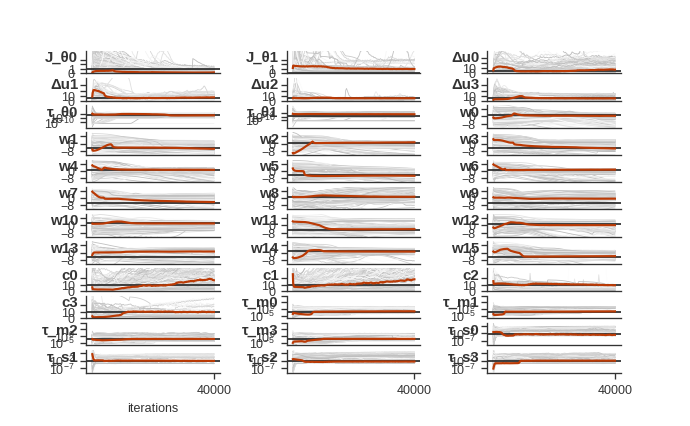

In [14]:
lib.plot_fitcoll_grid(fitcoll_4pop, lib.plotdescs_4pop)
if savefig:
    plt.savefig("figures/supp-4pop-fits" + '.' + saveext.strip('.'))
fig_4pop = plt.gcf()

## Cost, 2-pop fit

In [ ]:
plt.figure(figsize=ml.utils.mm2in(320/4, 270/4))
ax = plt.subplot(111);
fitcoll_2pop.plot_cost();
ax.set_yticks([fitcoll.result_cost.logL - 500, fitcoll.result_cost.logL]);
ax.set_yticklabels(['$\\log\\,p_{max} - 500$', '$\\log\\,p_{max}$']);
ax.set_ylim(fitcoll.result_cost.logL - 1000, fitcoll.result_cost.logL + 100);
ax.set_xticks([0, 3e4])
#ax.set_xticklabels(["0", ""])
#plt.savefig("assets/fit-2pop-logp.pdf", transparent=True);